# Imported necessary packages and data

Took a look at the data, renamed columns 

In [201]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import operator 
import json
from collections import Counter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

import json

import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#Import data that you previously collected using your Twitter APi credentials 
#Overview of how to pull tweets is listed here: https://medium.com/@jayeshsrivastava470/how-to-extract-tweets-from-twitter-in-python-47dd07f4e8e7
tweets_df = pd.read_csv('twitter_dataframe3 (3).csv')
tweets_df.head()

,Unnamed: 0,contributors,coord,coordinates,country,created_at,display_text_range,entities,extended_entities,extended_tweet,...,user,user_display_name,user_favourites_count,user_followers_count,user_friends_count,user_language,user_location_name,user_screen_name,user_statuses_count,user_verfied
0,0,NaN,NaN,NaN,United States,Sun Mar 31 14:32:21 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'Barr is corrupt and he needs to...,...,"{'id': 3885506301, 'id_str': '3885506301', 'na...",Marie Maduemezia,807,23,116,en,"Albany, NY",MarieMaduemezi1,596,False
1,1,NaN,NaN,NaN,Canada,Sun Mar 31 14:32:23 +0000 2019,NaN,"{'hashtags': [{'text': 'snow', 'indices': [124...",NaN,NaN,...,"{'id': 2199856812, 'id_str': '2199856812', 'na...",Mike,219,2011,2194,en,Hamilton Ontario,MikeDaddyReal,775,False
2,2,NaN,NaN,NaN,Canada,Sun Mar 31 14:32:27 +0000 2019,"[0, 77]","{'hashtags': [{'text': 'HamOnt', 'indices': [4...","{'media': [{'id': 1112362014494490629, 'id_str...",NaN,...,"{'id': 1202255588, 'id_str': '1202255588', 'na...",Gary Yokoyama,264,1494,523,en,"Hamilton,Ontario",Yokoatthespec,2202,False
3,3,NaN,NaN,NaN,United States,Sun Mar 31 14:32:28 +0000 2019,"[27, 57]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,...,"{'id': 17695016, 'id_str': '17695016', 'name':...",NYFarmer,83037,27296,29841,en,New York State,NYFarmer,222317,False
4,4,NaN,NaN,NaN,United States,Sun Mar 31 14:32:33 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,...,"{'id': 2819120790, 'id_str': '2819120790', 'na...",Carol Schneider,2830,90,321,en,"Dundee, NY",OneeghaCarol,854,False


In [202]:
#long list of columns, check them all 

list(tweets_df.columns.values)

['Unnamed: 0',
 'contributors',
 'coord',
 'coordinates',
 'country',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'extended_tweet-full_text',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'location_city',
 'location_name',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'reply_count',
 'retweet_count',
 'retweeted',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'user',
 'user_display_name',
 'user_favourites_count',
 'user_followers_count',
 'user_friends_count',
 'user_language',
 'user_location_name',
 'user_screen_name',
 'user_statuses_count',
 'user_verfied']

In [203]:
#get rid of redundant column
del tweets_df['Unnamed: 0']

In [204]:
#raname tweet column something easier to work with 
tweets_df.rename(columns={'extended_tweet-full_text':'tweets'}, inplace=True)

In [205]:
#make sure it worked
tweets_df['tweets'].head()

0    Barr is corrupt and he needs to be held accoun...
1    Got ready to go to my first @BlueJays game thi...
2    Start of the 125th Around The Bay Road Race #H...
3    @DerrickJosi @AgricolaArat In NY. https://t.co...
4    THE DAY COLLUSION DIED https://t.co/Q3ttvp7e4L...
Name: tweets, dtype: object

In [206]:
tweets_df['tweets'].describe()

count                                            776
unique                                           388
top       @brittlestar Happy birthday, Shannon! ❤️🎂🍷
freq                                               2
Name: tweets, dtype: object

# Hashtags

Before removing hashtags as special characters, I wanted to see which were the most popular

In [163]:
hashtags = []

def hashtag_extract(x):
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [164]:
HT_all = hashtag_extract(tweets_df['tweets'])
HT_all = sum(HT_all,[])

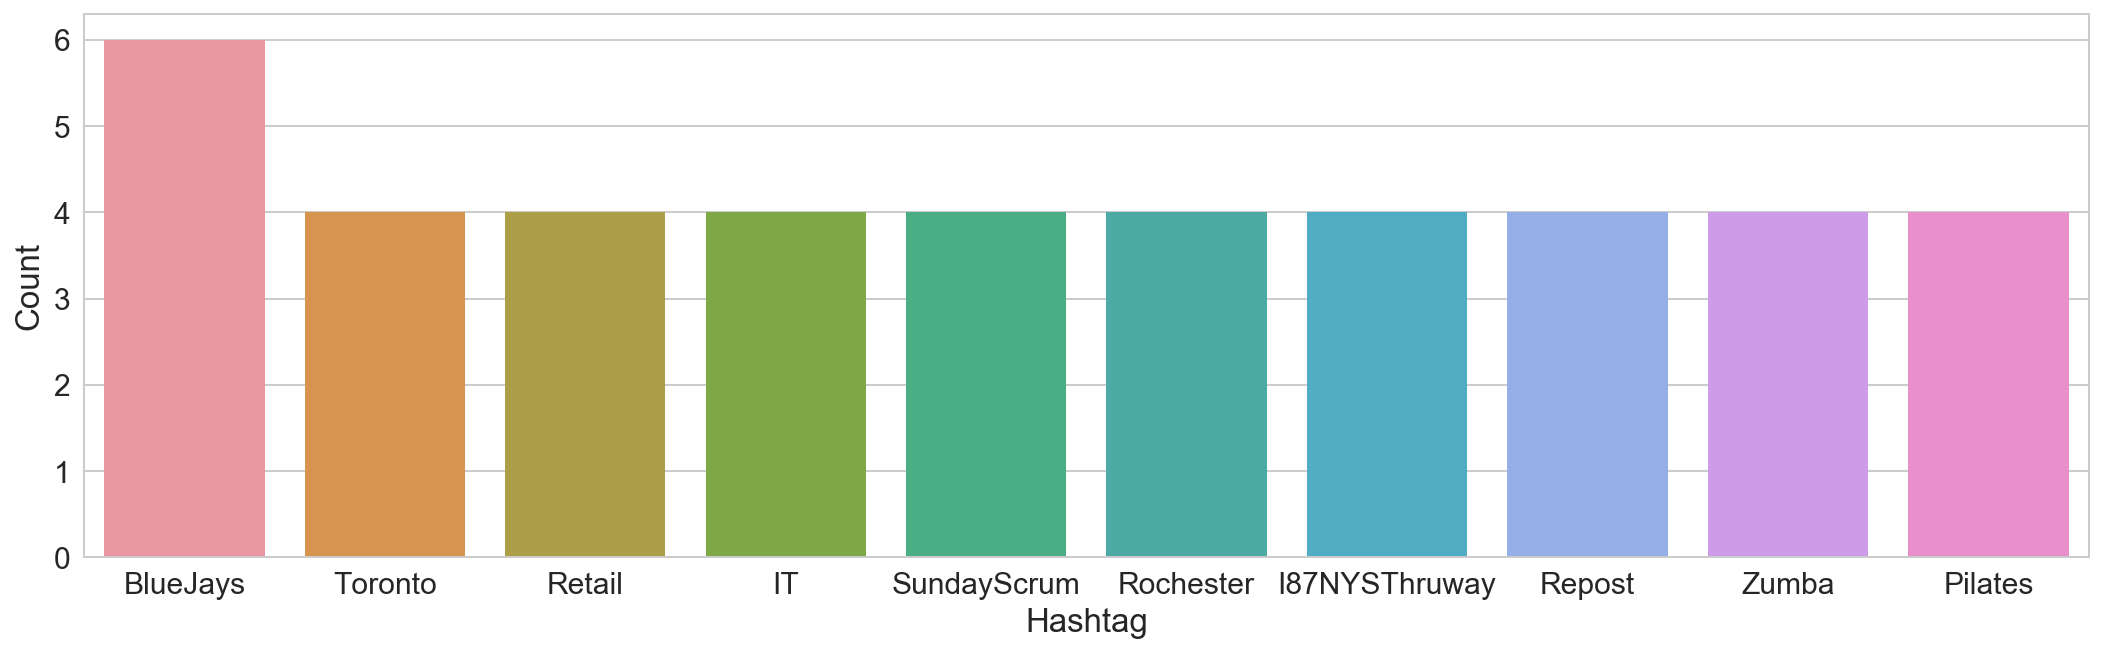

In [165]:
a = nltk.FreqDist(HT_all)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [210]:
#I craeted a new column for hastags 
tweets_df['hash'] = hashtags
tweets_df['hash'].head()

0                  []
1    [snow, BlueJays]
2            [HamOnt]
3                  []
4                  []
Name: hash, dtype: object

# Clean Tweets 

Clean tweets for analysis 

In [58]:
#Remove twitter handels by removing patterm 
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [59]:
# remove twitter handles (@user)
tweets_df['tidy_tweet'] = np.vectorize(remove_pattern)(tweets_df['tweets'], "@[\w]*")

In [111]:
# remove special characters, numbers, punctuations
tweets_df['tidy_tweet'] = tweets_df['tidy_tweet'].str.replace("[^a-zA-Z]", " ")

In [112]:
#Remove urls
tweets_df['tidy_tweet'] = tweets_df['tidy_tweet'].str.replace('http\S+|www.\S+', '', case=False)

In [113]:
#Remove short words
tweets_df['tidy_tweet'] = tweets_df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [114]:
tweets_df['tidy_tweet'].head()

0    barr corrupt need held account respect offic h...
1    readi first game year shovel driveway summer c...
2    start around road race hamont look updat zolad...
3                                                 ucyd
4                                           collu ttvp
Name: tidy_tweet, dtype: object

In [115]:
#Tokenize tweet 
tokenized_tweet = tweets_df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [barr, corrupt, need, held, account, respect, ...
1    [readi, first, game, year, shovel, driveway, s...
2    [start, around, road, race, hamont, look, upda...
3                                               [ucyd]
4                                        [collu, ttvp]
Name: tidy_tweet, dtype: object

In [116]:
#Stem tweets
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [barr, corrupt, need, held, account, respect, ...
1    [readi, first, game, year, shovel, driveway, s...
2    [start, around, road, race, hamont, look, upda...
3                                               [ucyd]
4                                        [collu, ttvp]
Name: tidy_tweet, dtype: object

In [117]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets_df['tidy_tweet'] = tokenized_tweet

In [118]:
#Review clean tweets 
tweets_df['tidy_tweet'].head()

0    barr corrupt need held account respect offic h...
1    readi first game year shovel driveway summer c...
2    start around road race hamont look updat zolad...
3                                                 ucyd
4                                           collu ttvp
Name: tidy_tweet, dtype: object

# Create word clouds

First create a word cloud of all words, then of words based on sentiment analysis

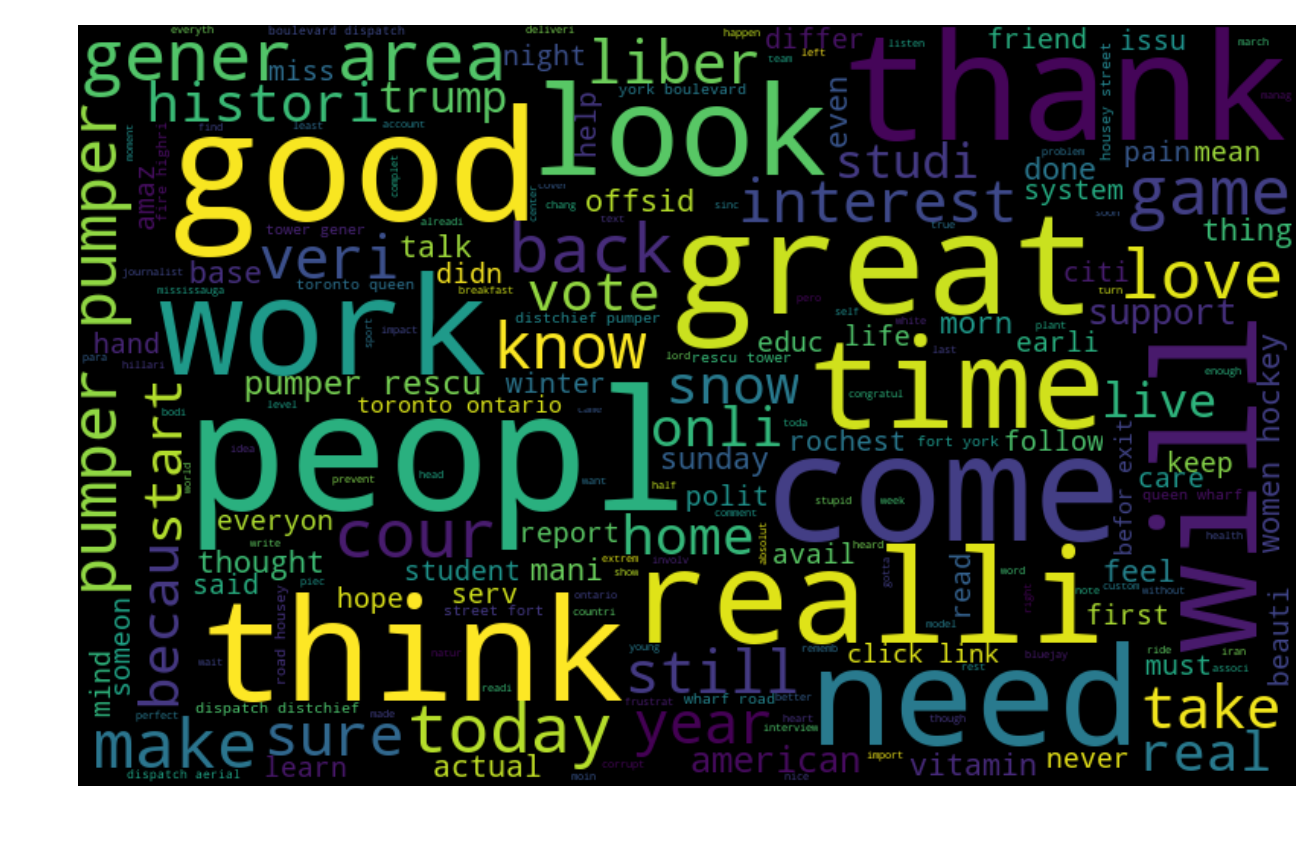

In [119]:
#Create a word cloud of all tweets
all_words = ' '.join([text for text in tweets_df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [120]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [121]:
#Assign sentiment scores to tweets
def sentiment_value(text):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(text)
    score = result['compound']
    if score >= 0.05:
        return 1
    elif (score > -0.05) and (score < 0.05):
        return 0
    else:
        return -1

In [122]:
#Check to make sure sentiment scores are applied correctly
sample = tweets_df['tidy_tweet'][10]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

that interest take seen cour approv through process wonder which came core team shot down howev origin wonder what possibl could exist cour which there mani
Sentiment: 
1


In [123]:
label =[]

In [124]:
#Create new row of sentiment values of all tweets 
#I asked for help here
#https://stackoverflow.com/questions/56014645/text-sentiment-scoring-returning-function-sentiment-value-at-instead-of-in

for row in tweets_df['tidy_tweet']:
    label.append(sentiment_value(row))

In [74]:
len(label)

776

In [125]:
tweets_df['label'] = label

In [126]:
#Make sure that new label row has properly populated with sentiment score
tweets_df.head()

,contributors,coord,coordinates,country,created_at,display_text_range,entities,extended_entities,extended_tweet,tweets,...,user_favourites_count,user_followers_count,user_friends_count,user_language,user_location_name,user_screen_name,user_statuses_count,user_verfied,tidy_tweet,label
0,NaN,NaN,NaN,United States,Sun Mar 31 14:32:21 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'Barr is corrupt and he needs to...,Barr is corrupt and he needs to be held accoun...,...,807,23,116,en,"Albany, NY",MarieMaduemezi1,596,False,barr corrupt need held account respect offic h...,-1
1,NaN,NaN,NaN,Canada,Sun Mar 31 14:32:23 +0000 2019,NaN,"{'hashtags': [{'text': 'snow', 'indices': [124...",NaN,NaN,Got ready to go to my first @BlueJays game thi...,...,219,2011,2194,en,Hamilton Ontario,MikeDaddyReal,775,False,readi first game year shovel driveway summer c...,0
2,NaN,NaN,NaN,Canada,Sun Mar 31 14:32:27 +0000 2019,"[0, 77]","{'hashtags': [{'text': 'HamOnt', 'indices': [4...","{'media': [{'id': 1112362014494490629, 'id_str...",NaN,Start of the 125th Around The Bay Road Race #H...,...,264,1494,523,en,"Hamilton,Ontario",Yokoatthespec,2202,False,start around road race hamont look updat zolad...,0
3,NaN,NaN,NaN,United States,Sun Mar 31 14:32:28 +0000 2019,"[27, 57]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,@DerrickJosi @AgricolaArat In NY. https://t.co...,...,83037,27296,29841,en,New York State,NYFarmer,222317,False,ucyd,0
4,NaN,NaN,NaN,United States,Sun Mar 31 14:32:33 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,THE DAY COLLUSION DIED https://t.co/Q3ttvp7e4L...,...,2830,90,321,en,"Dundee, NY",OneeghaCarol,854,False,collu ttvp,0


In [127]:
#Find out how many tweets are positive, neutral, and negative
positives = tweets_df['label'][tweets_df.label == 1]
neutrals = tweets_df['label'][tweets_df.label == 0]
negatives = tweets_df['label'][tweets_df.label == -1]
print('number of positve tagged sentences is:  {}'.format(len(positives)))
print('number of neutral tagged sentences is:  {}'.format(len(neutrals)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))

number of positve tagged sentences is:  246
number of neutral tagged sentences is:  414
number of negative tagged sentences is: 116


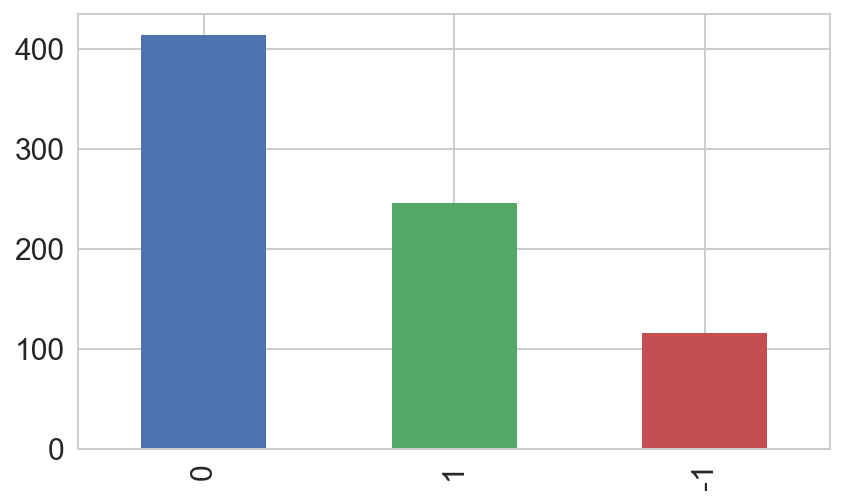

In [137]:
#Visualise the above 
tweets_df['label'].value_counts().plot(kind='bar')

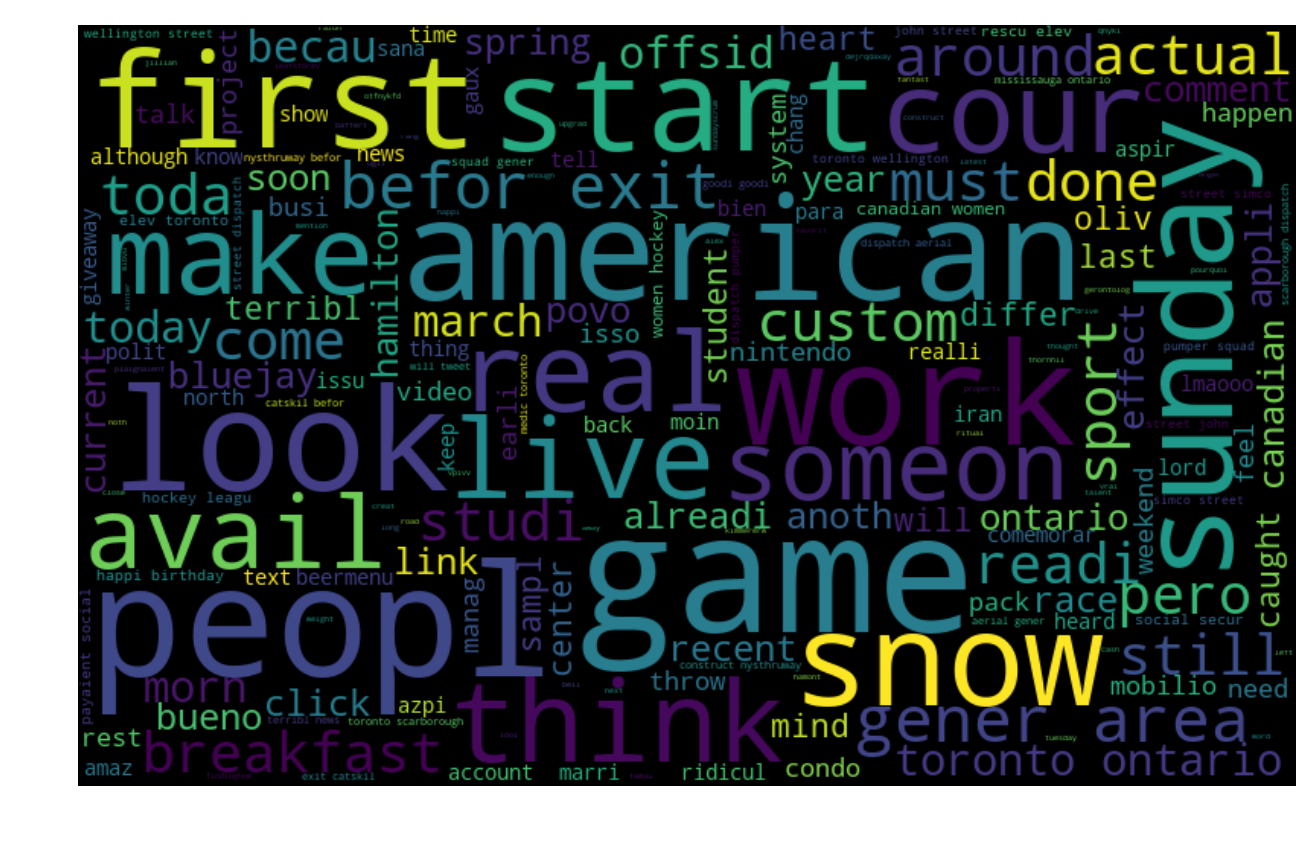

In [128]:
#Create word cloud of neutral tweets
normal_words =' '.join([text for text in tweets_df['tidy_tweet'][tweets_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

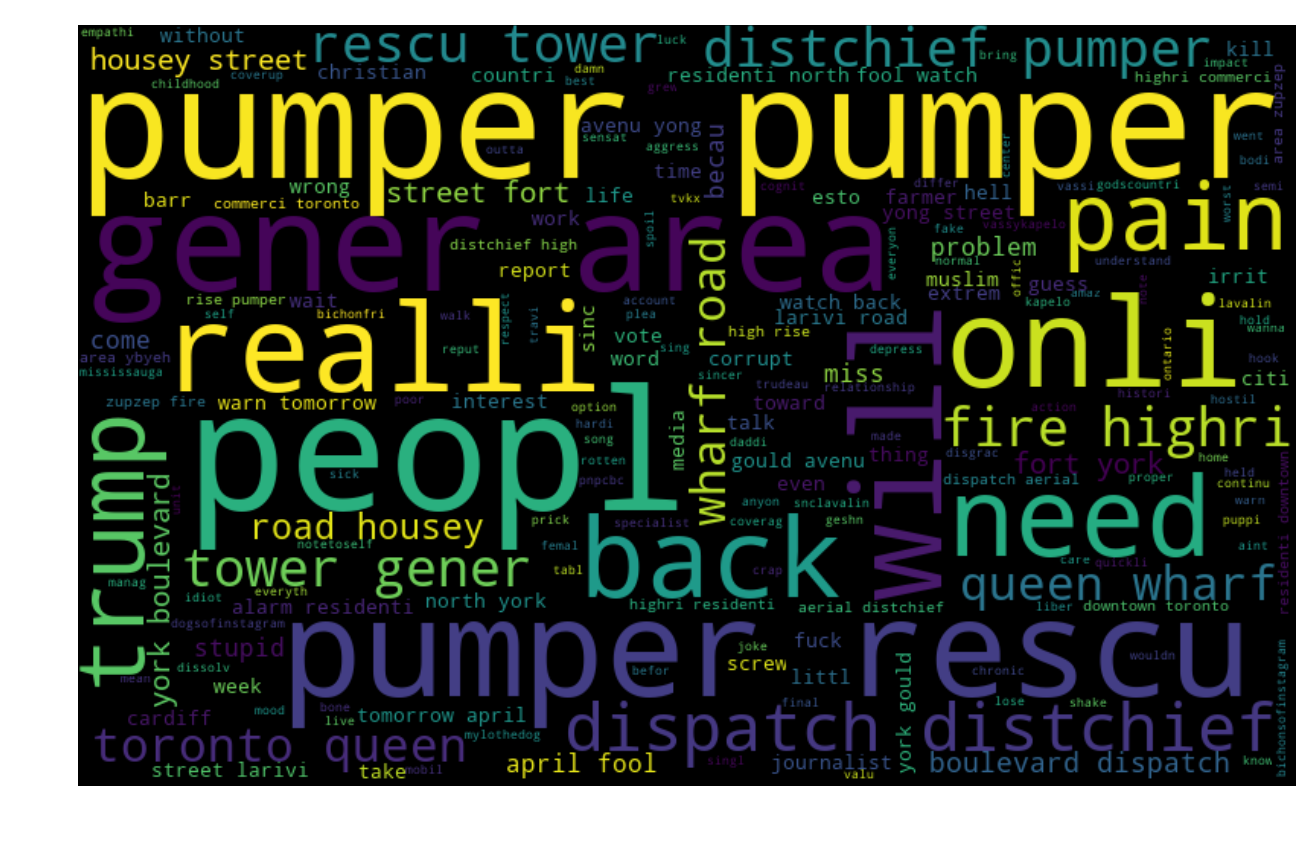

In [129]:
#Create word cloud of negative tweets
negative_words = ' '.join([text for text in tweets_df['tidy_tweet'][tweets_df['label'] == -1]])

wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

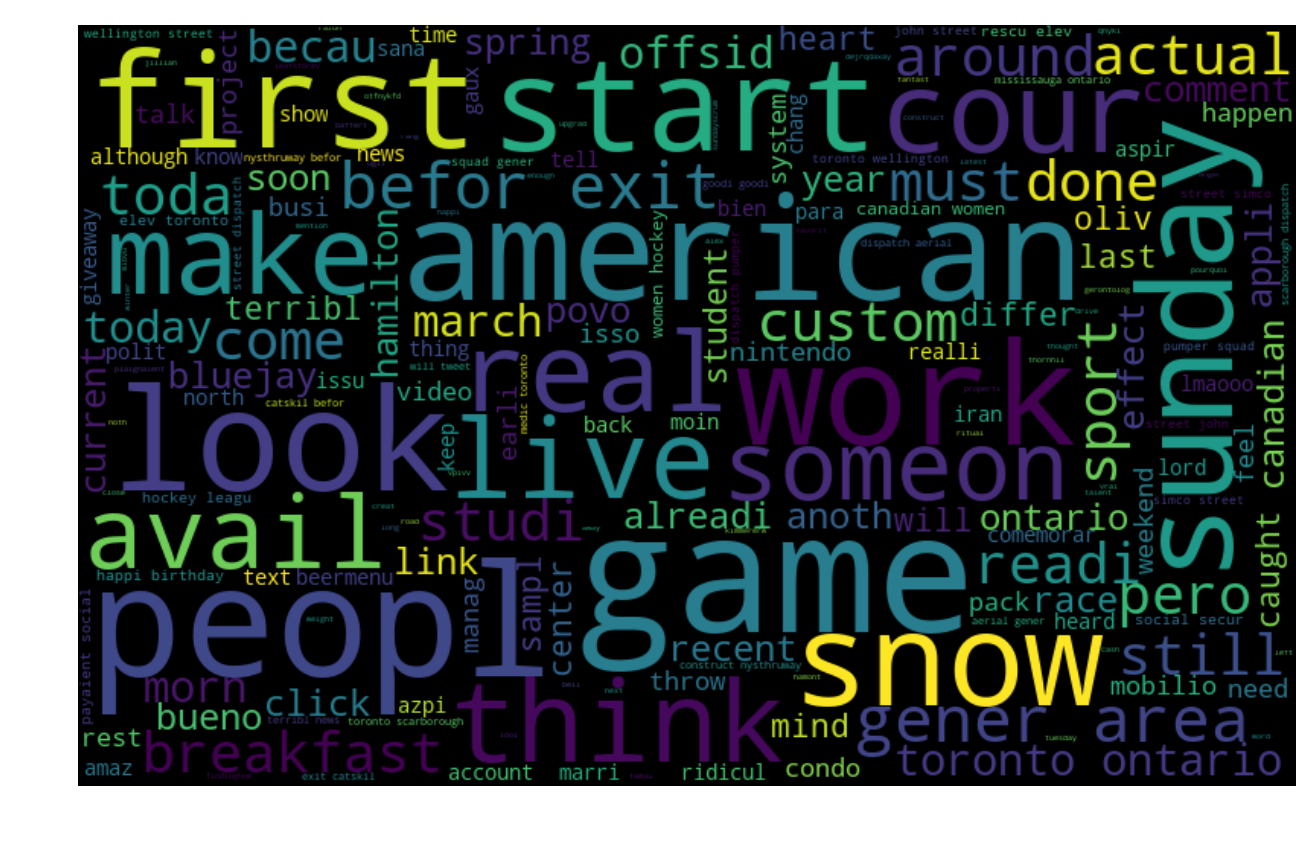

In [130]:
#Create word cloud of positive tweets
#Positive words are the same as neutral words

positive_words =' '.join([text for text in tweets_df['tidy_tweet'][tweets_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Take a look at most frequently used words

In [142]:
from collections import Counter

In [143]:
# get most common words in dataset
all_words = []
for line in list(tweets_df['tidy_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('that', 108),
 ('with', 64),
 ('your', 58),
 ('have', 56),
 ('what', 44),
 ('just', 42),
 ('about', 40),
 ('there', 40),
 ('they', 40),
 ('peopl', 36)]

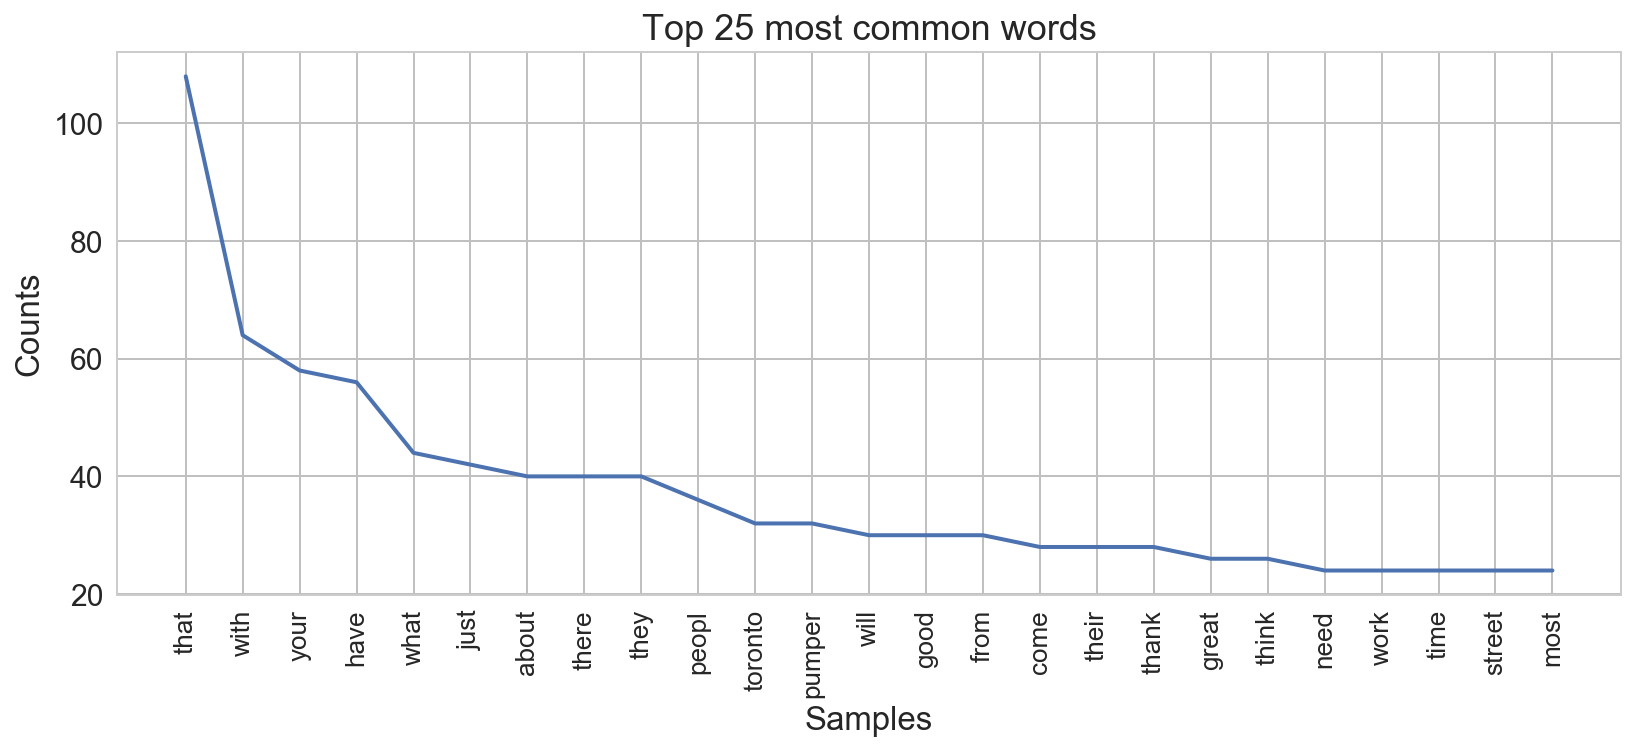

In [144]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)